In [1]:
import tensorflow as tf
import os

train_dir = 'Datasets/houses-image-train'
validation_dir = 'Datasets/houses-image-validation'
# print(os.getcwd())
tf.__version__

'2.12.0'

In [2]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  print(f'last accucary result : acc = {acc[-1]}, val_acc = {val_acc[-1]}')
  print(f'last loss result : loss = {loss[-1]}, val_loss = {val_loss[-1]}')

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [17]:
validation_generator.class_indices

{'luxury': 0, 'poor': 1}

Epoch 1/100
4/4 - 3s - loss: 0.7070 - accuracy: 0.5000 - val_loss: 0.7132 - val_accuracy: 0.5000 - 3s/epoch - 664ms/step
Epoch 2/100
4/4 - 1s - loss: 0.7172 - accuracy: 0.5000 - val_loss: 0.7124 - val_accuracy: 0.5000 - 1s/epoch - 357ms/step
Epoch 3/100
4/4 - 1s - loss: 0.7086 - accuracy: 0.5000 - val_loss: 0.7118 - val_accuracy: 0.5000 - 1s/epoch - 365ms/step
Epoch 4/100
4/4 - 1s - loss: 0.7083 - accuracy: 0.5125 - val_loss: 0.7113 - val_accuracy: 0.5000 - 1s/epoch - 366ms/step
Epoch 5/100
4/4 - 1s - loss: 0.7082 - accuracy: 0.5000 - val_loss: 0.7108 - val_accuracy: 0.5000 - 1s/epoch - 363ms/step
Epoch 6/100
4/4 - 1s - loss: 0.7113 - accuracy: 0.5000 - val_loss: 0.7102 - val_accuracy: 0.5000 - 1s/epoch - 361ms/step
Epoch 7/100
4/4 - 1s - loss: 0.7098 - accuracy: 0.5000 - val_loss: 0.7098 - val_accuracy: 0.5000 - 1s/epoch - 366ms/step
Epoch 8/100
4/4 - 2s - loss: 0.7020 - accuracy: 0.5000 - val_loss: 0.7093 - val_accuracy: 0.5000 - 2s/epoch - 381ms/step
Epoch 9/100
4/4 - 1s - loss: 0.7

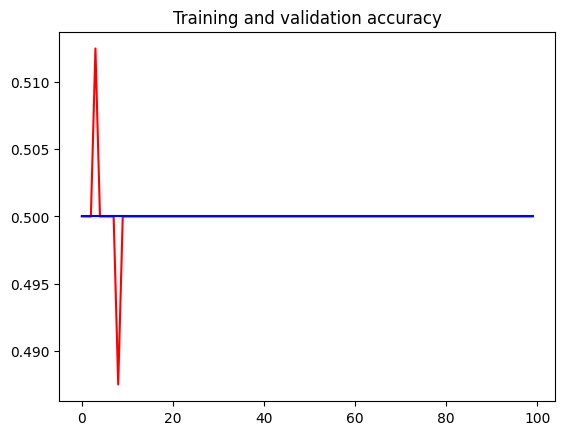

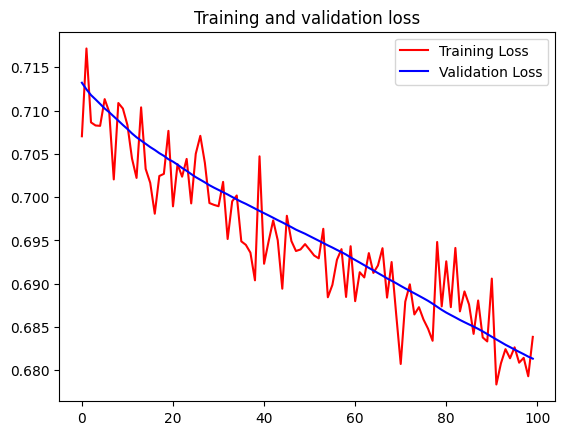

In [20]:
simple_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,3,input_shape=(150,150,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

simple_cnn.compile(optimizer=tf.keras.optimizers.Adam(1e-7),
                   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                   metrics=['accuracy'])

plot_loss_acc(simple_cnn.fit(train_generator,
                            epochs=100,
                            validation_data=validation_generator,
                            verbose=2))

In [31]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

files = [f'test{i}.png' for i in range(1,7)]
files.append('test1.jpg')

for fn in files:
 
  # predicting images
  path = fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = simple_cnn.predict(images, batch_size=10, verbose=0)
  
  # print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is poor")
  else:
    print(fn + " is luxury")

test1.png is poor
test2.png is luxury
test3.png is poor
test4.png is poor
test5.png is poor
test6.png is poor
test1.jpg is luxury
